# Importing Libraries
### Libraries contain certain functions which can be used to perform a specific task

In [30]:
import numpy as np    #importing numpy for handling with arrays
import pandas as pd   #importing pandas for handling with dataframes
from sklearn.model_selection import train_test_split  #importing train 
                                            #test split for splitting the data
import seaborn as sns  #importing seaborn for plotting
from scipy import stats #importing stats for calculating z score.
from scipy.stats import chi2 #importing chi2 for Chi-Sqaure Distribution 

# Setting column names and reading the data

In [31]:
# we create a variable colnames which contains all the names of the individual columns.
colnames = ["Temperature (Min) oC.", "Temperature (Max) oC.", 
            "Temperature (Mean) oC.", "Relative Humidity (Min) %.", 
            "Relative Humidity (Max) %.", "Relative Humidity (Mean) %.", 
            "Sea Level Pressure (Min) hP a.", "Sea Level Pressure (Max) hP a.", 
            "Sea Level Pressure (Mean) hP a.", "Precipitation Total mm.", 
            "Snowfall Amount cm.", "Sunshine Duration min.", 
            "Wind Gust (Min) Km/h.", "Wind Gust (Max) Km/h.", 
            "Wind Gust (Mean) Km/h.", "Wind Speed (Min) Km/h.", 
            "Wind Speed (Max) Km/h.", "Wind Speed (Mean) Km/h"]

In [32]:
# by using read_csv we create a dataframe by specifing the data and 
#the names for each column in data set
df = pd.read_csv("/content/drive/MyDrive/ClimateDataBasel.csv", names=colnames)

In [33]:
# we now see how the data look and the weather the 
#dataframe was created properly.
df.head()

,Temperature (Min) oC.,Temperature (Max) oC.,Temperature (Mean) oC.,Relative Humidity (Min) %.,Relative Humidity (Max) %.,Relative Humidity (Mean) %.,Sea Level Pressure (Min) hP a.,Sea Level Pressure (Max) hP a.,Sea Level Pressure (Mean) hP a.,Precipitation Total mm.,Snowfall Amount cm.,Sunshine Duration min.,Wind Gust (Min) Km/h.,Wind Gust (Max) Km/h.,Wind Gust (Mean) Km/h.,Wind Speed (Min) Km/h.,Wind Speed (Max) Km/h.,Wind Speed (Mean) Km/h
0,8.100529,17.570530,13.445111,61,96,77.875000,1013.1,1018.4,1015.75830,0.2,0.0,350.56274,3.240000,23.400000,12.210002,1.787066,10.403253,6.639939
1,11.110529,18.490528,14.988861,59,94,76.458336,1013.9,1016.6,1014.99170,1.9,0.0,287.23404,6.479999,25.199999,14.880001,4.161301,16.285300,8.616541
2,10.320529,18.170528,14.267612,71,96,83.583336,1015.3,1017.5,1016.38745,0.1,0.0,126.26506,3.240000,24.119999,12.764999,2.028842,11.289829,6.372418
3,10.450529,24.980530,17.309278,54,92,77.625000,1015.9,1018.7,1017.26250,0.0,0.0,881.24710,2.160000,20.160000,9.480000,0.799200,11.483046,4.690738
4,12.350529,25.610529,19.881780,47,88,66.583336,1015.7,1020.7,1018.18353,0.0,0.0,951.56665,0.720000,15.840000,5.565001,0.376747,6.443357,3.311275


# Check if there are any null or missing values in the data

In [34]:
# this if else condition is used to check if there are any 
#missing values in the data. 
#df is the dataframe, isnull().values.any() is used to find if 
#there are any null values in dataset. df.isnull().values.any() 
#returns a True or False result.

if (df.isnull().values.any() == True):    
  print("There are missing/null values")
else:
  print("There are no missing/null values")

There are no missing/null values


In [35]:
# this line was just added to prove that there are no missing values.
print("Check if there are any missing values: ", df.isnull().values.any())

Check if there are any missing values:  False


In [36]:
# We use this command to see the number of missing/null values in each 
#column of the data set.
print("Checking the number of missing values in each column:\n", 
      df.isnull().sum())

Checking the number of missing values in each column:
 Temperature (Min) oC.              0
Temperature (Max) oC.              0
Temperature (Mean) oC.             0
Relative Humidity (Min) %.         0
Relative Humidity (Max) %.         0
Relative Humidity (Mean) %.        0
Sea Level Pressure (Min) hP a.     0
Sea Level Pressure (Max) hP a.     0
Sea Level Pressure (Mean) hP a.    0
Precipitation Total mm.            0
Snowfall Amount cm.                0
Sunshine Duration min.             0
Wind Gust (Min) Km/h.              0
Wind Gust (Max) Km/h.              0
Wind Gust (Mean) Km/h.             0
Wind Speed (Min) Km/h.             0
Wind Speed (Max) Km/h.             0
Wind Speed (Mean) Km/h             0
dtype: int64


In [37]:
# we use describe() to display some basic summary of the dataframe, we can 
#see that the count of all the columns is same which indicate 
#there are indeed no missing values.
print("A summary of the given data")
df.describe()

A summary of the given data


,Temperature (Min) oC.,Temperature (Max) oC.,Temperature (Mean) oC.,Relative Humidity (Min) %.,Relative Humidity (Max) %.,Relative Humidity (Mean) %.,Sea Level Pressure (Min) hP a.,Sea Level Pressure (Max) hP a.,Sea Level Pressure (Mean) hP a.,Precipitation Total mm.,Snowfall Amount cm.,Sunshine Duration min.,Wind Gust (Min) Km/h.,Wind Gust (Max) Km/h.,Wind Gust (Mean) Km/h.,Wind Speed (Min) Km/h.,Wind Speed (Max) Km/h.,Wind Speed (Mean) Km/h
count,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000
mean,8.738776,16.779298,12.717350,54.092456,87.004538,71.040509,1014.690925,1020.364492,1017.576393,1.502893,0.068015,399.168240,7.235326,30.464208,17.567084,2.932845,14.858762,8.418839
std,7.803700,9.647769,8.788555,12.949827,7.892077,10.012178,8.848251,8.014133,8.282298,3.496710,0.513935,294.660868,8.221851,16.491422,11.504750,3.470768,7.871249,5.205606
min,-12.519471,-4.389471,-7.628221,19.000000,53.000000,38.333332,976.100000,981.400000,978.450000,0.000000,0.000000,0.000000,0.000000,4.320000,2.715000,0.000000,2.881557,1.495064
25%,1.700529,8.200529,4.689279,44.000000,82.000000,63.520834,1010.300000,1015.900000,1013.233400,0.000000,0.000000,123.972160,2.160000,19.080000,9.765000,0.842431,9.304952,4.872080
50%,10.210529,17.400530,14.618446,54.000000,88.000000,72.000000,1014.600000,1019.500000,1016.954040,0.000000,0.000000,387.746280,4.320000,26.280000,14.145000,1.864800,12.988194,6.939507
75%,15.530529,25.190529,20.432405,64.000000,93.000000,78.750000,1019.300000,1024.400000,1021.760405,1.200000,0.000000,619.156720,8.820000,37.440000,21.667500,3.729600,18.398964,10.108294
max,25.820530,36.700527,30.425112,93.000000,100.000000,95.250000,1043.600000,1049.900000,1047.095800,37.399994,13.860001,962.283300,57.960000,133.200000,90.749990,26.673279,59.192370,36.360706


## From the above two commands we can see that there are no missing values in the data.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


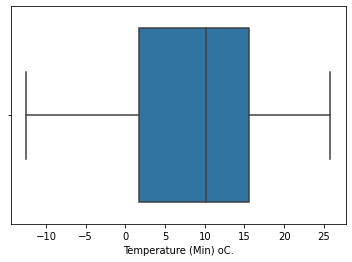

In [38]:
sns.boxplot(df['Temperature (Min) oC.'])

In [39]:
length_height = df.shape[0]
length_col = df.shape[1]
length_height,length_col

(1763, 18)

In [40]:
df.iloc[:,0]

0        8.100529
1       11.110529
2       10.320529
3       10.450529
4       12.350529
          ...    
1758     6.160529
1759     1.830529
1760    -0.529471
1761     0.440529
1762     2.960529
Name: Temperature (Min) oC., Length: 1763, dtype: float64

# Remove Outliers
### We have used different outlier detection methods such a z-score, quartile range, and distance approach using Mahalanobis Distance to find outliers. We can see that there is almost no difference in the results but each of the method.


### Z-Score
### Z-score represents how much standard deviation is a data point from the mean.
### 68% of the data points lie between +/- 1 standard deviation.
### 95% of the data points lie between +/- 2 standard deviation
### 99.7% of the data points lie between +/- 3 standard deviation
### Z score and Outliers:
### If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points. Such a data point can be an outlier.


### The formula for z-score is Z score = (x -mean) / std. Deviation 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


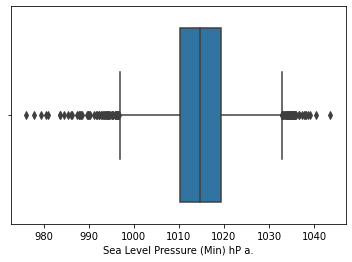

In [41]:
sns.boxplot(df.iloc[:,6]) #we can see that there are multiple 
#outliers in the this sample 

In [42]:
# Z-score appraoch to remove outliers.

# 1)For each column, it first computes the Z-score of each value in the column,
# relative to the column mean and standard deviation.
# 2)It then takes the absolute Z-score because the direction does not matter,
# only if it is below the threshold.
# 3)all(axis=1) ensures that for each row, all column satisfy the constraint.
# 4)Finally, the result of this condition is used to index the dataframe.

df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

,Temperature (Min) oC.,Temperature (Max) oC.,Temperature (Mean) oC.,Relative Humidity (Min) %.,Relative Humidity (Max) %.,Relative Humidity (Mean) %.,Sea Level Pressure (Min) hP a.,Sea Level Pressure (Max) hP a.,Sea Level Pressure (Mean) hP a.,Precipitation Total mm.,Snowfall Amount cm.,Sunshine Duration min.,Wind Gust (Min) Km/h.,Wind Gust (Max) Km/h.,Wind Gust (Mean) Km/h.,Wind Speed (Min) Km/h.,Wind Speed (Max) Km/h.,Wind Speed (Mean) Km/h
0,8.100529,17.570530,13.445111,61,96,77.875000,1013.1,1018.4,1015.75830,0.2,0.0,350.56274,3.240000,23.400000,12.210002,1.787066,10.403253,6.639939
1,11.110529,18.490528,14.988861,59,94,76.458336,1013.9,1016.6,1014.99170,1.9,0.0,287.23404,6.479999,25.199999,14.880001,4.161301,16.285300,8.616541
2,10.320529,18.170528,14.267612,71,96,83.583336,1015.3,1017.5,1016.38745,0.1,0.0,126.26506,3.240000,24.119999,12.764999,2.028842,11.289829,6.372418
3,10.450529,24.980530,17.309278,54,92,77.625000,1015.9,1018.7,1017.26250,0.0,0.0,881.24710,2.160000,20.160000,9.480000,0.799200,11.483046,4.690738
4,12.350529,25.610529,19.881780,47,88,66.583336,1015.7,1020.7,1018.18353,0.0,0.0,951.56665,0.720000,15.840000,5.565001,0.376747,6.443357,3.311275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,6.160529,10.110529,7.720112,82,94,87.500000,1025.6,1034.7,1028.06240,5.0,0.0,0.00000,9.720000,32.760002,18.974997,3.786256,17.082869,9.509177
1759,1.830529,7.000528,4.553861,53,95,75.625000,1034.7,1040.3,1038.10850,0.0,0.0,502.84442,3.600000,23.039999,16.994999,1.332000,14.241816,8.690425
1760,-0.529471,4.230528,1.380112,40,83,63.291668,1036.7,1039.8,1038.11240,0.0,0.0,489.58572,5.760000,24.840000,17.070000,1.191377,10.290077,5.954996
1761,0.440529,7.760529,3.317195,41,69,53.416668,1032.2,1037.5,1034.68320,0.0,0.0,513.05000,2.160000,25.560000,16.140000,0.266400,7.406686,3.565386


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


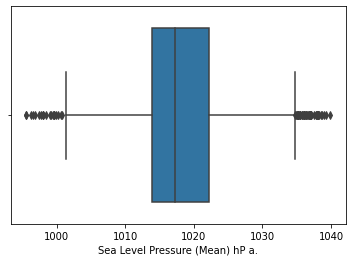

In [43]:
# we can a significant number of outliers are removed using z-score approach
sns.boxplot(df[(np.abs(stats.zscore(df)) < 3).all(axis=1)].iloc[:,8]) 

### Quartile Range Approach

In [44]:
# we combine z-score and quartile range approach to remove more outliers
#find Q1, Q3, and interquartile range for each column

Q1 = df.quantile(q=.25)  #first quartile represents the 25th percentile 
                          #of the data.
Q3 = df.quantile(q=.75)  #third quartile represents the 75th percentile 
                          #of the data.
IQR = df.apply(stats.iqr) 

#We label a point as an outlier if it satisfies one of the following conditions:
#It’s greater than 75th percentile + 1.5 IQR
#It’s less than 25th percentile – 1.5 IQR
#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)] 

#find how many rows are left in the dataframe 
data_clean.shape

(1179, 18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


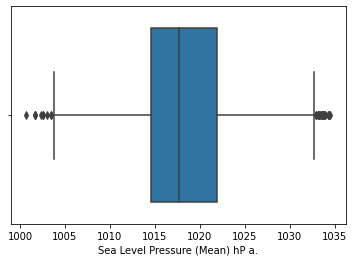

In [45]:
#we can see that combining the two appraoches removes even more outliers, 
#but we have to be carefull as the removing outliers is reducing the 
#size of data, thus doing it multiple time might be harmful

sns.boxplot(data_clean.iloc[:,8]) 

### Distance Based Approach using Mahalanobis Distance

In [46]:
# the data is converted to numpy array
df1 = df.to_numpy()

In [47]:
#we need to obtain the necessary values to calculate the 
#distance between center and point. 
#So, these are the center point and covariance matrix between variables
# Covariance matrix
covariance  = np.cov(df1, rowvar=False)

# Covariance matrix power of -1
covariance_pm1 = np.linalg.matrix_power(covariance, -1)

# Center point
centerpoint = np.mean(df1 , axis=0)

In [48]:
#we are ready to find the distance between the center point and each observation
# (point) in the data-set. 
#We also need to find a cutoff value from the Chi-Square distribution. 
#The reason why Chi-Square is used to find cutoff value is, Mahalanobis Distance
# returns the distance as squared (D² ). 
#We should also take the quantile value as 0.95 while finding cutoff because 
#the points outside the 0.95 (two-tailed) will be considered as an outlier. 
#Less quantile means less cutoff value. We also need a degree of freedom value 
#for Chi-Square, and it is equal to the number of 
#variables in our data-set, so 2.


# Distances between center point and 
distances = []
for i, val in enumerate(df1):
      p1 = val
      p2 = centerpoint
      distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
      distances.append(distance)
distances = np.array(distances)

# Cutoff (threshold) value from Chi-Sqaure Distribution for detecting outliers 
cutoff = chi2.ppf(0.95, df1.shape[1])

# Index of outliers
outlierIndexes = np.where(distances > cutoff )

In [49]:
# converting numpy array back to dataframe
df2 = pd.DataFrame(data=df1, columns=colnames)
df2.head()

,Temperature (Min) oC.,Temperature (Max) oC.,Temperature (Mean) oC.,Relative Humidity (Min) %.,Relative Humidity (Max) %.,Relative Humidity (Mean) %.,Sea Level Pressure (Min) hP a.,Sea Level Pressure (Max) hP a.,Sea Level Pressure (Mean) hP a.,Precipitation Total mm.,Snowfall Amount cm.,Sunshine Duration min.,Wind Gust (Min) Km/h.,Wind Gust (Max) Km/h.,Wind Gust (Mean) Km/h.,Wind Speed (Min) Km/h.,Wind Speed (Max) Km/h.,Wind Speed (Mean) Km/h
0,8.100529,17.570530,13.445111,61.0,96.0,77.875000,1013.1,1018.4,1015.75830,0.2,0.0,350.56274,3.240000,23.400000,12.210002,1.787066,10.403253,6.639939
1,11.110529,18.490528,14.988861,59.0,94.0,76.458336,1013.9,1016.6,1014.99170,1.9,0.0,287.23404,6.479999,25.199999,14.880001,4.161301,16.285300,8.616541
2,10.320529,18.170528,14.267612,71.0,96.0,83.583336,1015.3,1017.5,1016.38745,0.1,0.0,126.26506,3.240000,24.119999,12.764999,2.028842,11.289829,6.372418
3,10.450529,24.980530,17.309278,54.0,92.0,77.625000,1015.9,1018.7,1017.26250,0.0,0.0,881.24710,2.160000,20.160000,9.480000,0.799200,11.483046,4.690738
4,12.350529,25.610529,19.881780,47.0,88.0,66.583336,1015.7,1020.7,1018.18353,0.0,0.0,951.56665,0.720000,15.840000,5.565001,0.376747,6.443357,3.311275


In [50]:
# dropping the outliers from the obtained indexes
df2 = df.drop(index=outlierIndexes[0])

In [51]:
df2.shape #the shape suggests that we have successfully removed the outliear

(1538, 18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


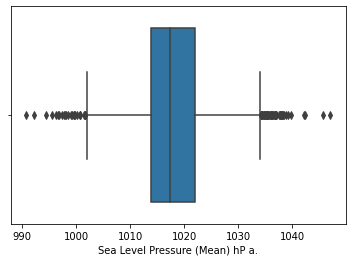

In [52]:
#we can that this distance based approach is also 
#usefull at removing th outliers.
sns.boxplot(df2.iloc[:,8])

# Feature Selection
### Here the variables are choosen based on the correlation they have.
### There are many better feature selection options but since at this we dont have the labels for the clustering dataset we can cant compare the features and labels to decide which features will be used.

In [53]:
#Generating the correlation matrix
correlation_matrix = df.corr()

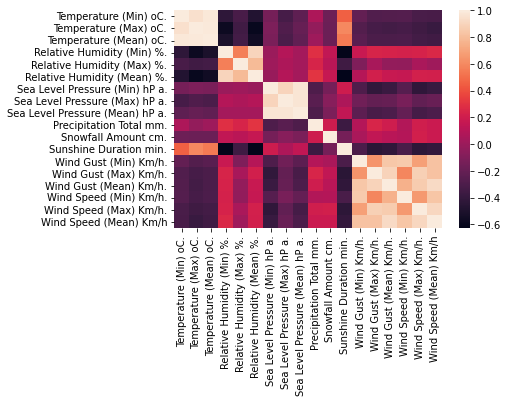

In [54]:
#Generating the correlation heat-map
sns.heatmap(correlation_matrix)

In [55]:
#we compare the correlation between features and remove one of two 
#features that have a correlation higher than 0.9
columns = np.full((correlation_matrix.shape[0],), True, dtype=bool)  #create a 
                                                #numpy array with .full function
for i in range(correlation_matrix.shape[0]): 
    for j in range(i+1, correlation_matrix.shape[0]):
        if correlation_matrix.iloc[i,j] >= 0.9:       
            if columns[j]:
                columns[j] = False        
selected_columns = df.columns[columns]
df3 = df[selected_columns]

In [56]:
selected_columns

Index(['Temperature (Min) oC.', 'Relative Humidity (Min) %.',
       'Relative Humidity (Max) %.', 'Relative Humidity (Mean) %.',
       'Sea Level Pressure (Min) hP a.', 'Precipitation Total mm.',
       'Snowfall Amount cm.', 'Sunshine Duration min.',
       'Wind Gust (Min) Km/h.', 'Wind Gust (Max) Km/h.',
       'Wind Gust (Mean) Km/h.', 'Wind Speed (Min) Km/h.',
       'Wind Speed (Max) Km/h.'],
      dtype='object')

# Normazilaztion and Standardization

In [57]:
#creating a function for normalization
def normalise(data):  # take data as parameter for function 
    normalisedData = data.copy()  #copy the data to normalisedData

    rows = data.shape[0]     #using .shape extract the number of rows 
    cols = data.shape[1]     #using .shape extract the number of columns

    for j in range(cols):    #initialize a for loop to normalize each element 
        maxElement = np.amax(data[:,j])         #find the max value in column
        minElement = np.amin(data[:,j])         #find the min value in column
        #apply the formula to each element of the data so normalize it.
        for i in range(rows):        
            normalisedData[i,j] = (data[i,j] - minElement) / (maxElement - minElement)    
        
    return normalisedData    #return the normalized data


In [58]:
numpy_df = df3.to_numpy()      #convert the dataframe to numpy array

In [59]:
normalisedData = normalise(numpy_df)    #pass the numpy array(actual data) 
                                        #to the funtion

In [60]:
 #now convert the normalized data back to dataframe
normalized_df = pd.DataFrame(normalisedData, columns=df3.columns)   
normalized_df.head()  #we can see all values range from 0-1

,Temperature (Min) oC.,Relative Humidity (Min) %.,Relative Humidity (Max) %.,Relative Humidity (Mean) %.,Sea Level Pressure (Min) hP a.,Precipitation Total mm.,Snowfall Amount cm.,Sunshine Duration min.,Wind Gust (Min) Km/h.,Wind Gust (Max) Km/h.,Wind Gust (Mean) Km/h.,Wind Speed (Min) Km/h.,Wind Speed (Max) Km/h.
0,0.537819,0.567568,0.914894,0.694729,0.548148,0.005348,0.0,0.364303,0.055901,0.148045,0.107855,0.066998,0.133575
1,0.616328,0.540541,0.872340,0.669839,0.560000,0.050802,0.0,0.298492,0.111801,0.162011,0.138184,0.156010,0.238031
2,0.595722,0.702703,0.914894,0.795022,0.580741,0.002674,0.0,0.131214,0.055901,0.153631,0.114159,0.076063,0.149319
3,0.599113,0.472973,0.829787,0.690337,0.589630,0.000000,0.0,0.915788,0.037267,0.122905,0.076844,0.029963,0.152750
4,0.648670,0.378378,0.744681,0.496340,0.586667,0.000000,0.0,0.988863,0.012422,0.089385,0.032373,0.014124,0.063253


In [61]:
# function to standardize the data 
def standard(data):
    standardData = data.copy()
    
    rows = data.shape[0]       #using .shape extract the number of rows 
    cols = data.shape[1]       #using .shape extract the number of columns

    for j in range(cols):
        sigma = np.std(data[:,j])       #calculate the standard deviation of the column
        mu = np.mean(data[:,j])         #calculate the mean of the column

        for i in range(rows):
            standardData[i,j] = (data[i,j] - mu)/sigma        #standardize each element using this formula

    return standardData      #return standardized data

In [62]:
numpy_df = normalized_df.to_numpy()    #converting the normalized data to numpy array

In [63]:
#passing the numply array to the standard function. 
#normalized data is passed because standardization assumes the data to be normal.
scaledData = standard(numpy_df)       
                                     

In [64]:
#the scaled data is converted to a dataframe
scaled_df = pd.DataFrame(scaledData, columns=normalized_df.columns)     
scaled_df.head()

,Temperature (Min) oC.,Relative Humidity (Min) %.,Relative Humidity (Max) %.,Relative Humidity (Mean) %.,Sea Level Pressure (Min) hP a.,Precipitation Total mm.,Snowfall Amount cm.,Sunshine Duration min.,Wind Gust (Min) Km/h.,Wind Gust (Max) Km/h.,Wind Gust (Mean) Km/h.,Wind Speed (Min) Km/h.,Wind Speed (Max) Km/h.
0,-0.081811,0.533560,1.140133,0.682812,-0.179852,-0.372711,-0.132379,-0.165001,-0.486078,-0.428478,-0.465773,-0.330216,-0.566209
1,0.304013,0.379073,0.886642,0.541277,-0.089413,0.113598,-0.132379,-0.379982,-0.091894,-0.319299,-0.233629,0.354044,0.181285
2,0.202750,1.305990,1.140133,1.253113,0.068855,-0.401318,-0.132379,-0.926423,-0.486078,-0.384807,-0.417519,-0.260536,-0.453542
3,0.219414,-0.007142,0.633151,0.657835,0.136684,-0.429924,-0.132379,1.636511,-0.617472,-0.625000,-0.703134,-0.614922,-0.428988
4,0.462957,-0.547843,0.126170,-0.445301,0.114075,-0.429924,-0.132379,1.875224,-0.792665,-0.887028,-1.043524,-0.736674,-1.069435


# Data 2


In [65]:
# creating and column names for the second data set and importing the data
colnames1 = "W", "L", "A"
data2 = pd.read_csv("/content/drive/MyDrive/WLA.csv", names=colnames1)
data2.head()

,W,L,A
0,25,35,875
1,16,45,720
2,1,39,39
3,2,36,72
4,6,13,78


In [66]:
#importing the labels for the second data set
data2_labels = pd.read_csv("/content/drive/MyDrive/Labels.csv", names=["Labels"])
data2_labels.head()

,Labels
0,2
1,2
2,2
3,2
4,2


In [67]:
#checking if there are any missing values in this case there are none
data2.isnull().sum()

W    0
L    0
A    0
dtype: int64

In [68]:
#using z-score approach to remove outliers
data2 = data2[(np.abs(stats.zscore(data2)) < 3).all(axis=1)]

In [69]:
data2.head()

,W,L,A
0,25,35,875
1,16,45,720
2,1,39,39
3,2,36,72
4,6,13,78


In [70]:
numpy_df = data2.to_numpy()  #converting data 2 in numpy array

In [71]:
normalizedData1 = normalise(numpy_df)  #normalize data 2

In [72]:
scaledData1 = standard(normalizedData1)    #standardize data 2

scaledData1 = pd.DataFrame(scaledData1, columns=data2.columns)
scaledData1.head()       #create the data frame

,W,L,A
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [73]:
#combine the scaled data and labels to make a final dataframe
data2 = pd.concat([scaledData1, data2_labels], axis=1)   

# Balancing the data
### Now we balance the data ie we check whether one of the labels is more in number than other. Because if both the labels are not balanced then the model can be biased towards the label with more count.

In [74]:
data2.head()

,W,L,A,Labels
0,0,0,0,2
1,0,0,0,2
2,0,0,0,2
3,0,0,0,2
4,0,0,0,2


In [75]:
#checking the counts of each label. 
#We can see that 1 has less number of data than 2
data2["Labels"].value_counts()    

2    102
1     86
Name: Labels, dtype: int64

In [76]:
#storing the rows with label "1" in one dataframe
ones = data2[data2.Labels == 1]    
ones

,W,L,A,Labels
17,0,0,0,1
19,0,0,0,1
21,0,0,0,1
23,0,0,0,1
25,0,0,0,1
...,...,...,...,...
179,0,0,0,1
181,0,0,0,1
183,0,0,0,1
185,0,0,0,1


In [77]:
#storing the rows with label "2" in one dataframe
twos = data2[data2.Labels == 2]     
twos.head()

,W,L,A,Labels
0,0,0,0,2
1,0,0,0,2
2,0,0,0,2
3,0,0,0,2
4,0,0,0,2


In [78]:
 #to perform undersampling we just match the counts of "1" and "2" labels
twos = twos.head(86)         

In [79]:
test = ones.append(twos)     #we then combine both the dataframe

In [80]:
test.head()

,W,L,A,Labels
17,0,0,0,1
19,0,0,0,1
21,0,0,0,1
23,0,0,0,1
25,0,0,0,1


In [81]:
#we randomly change the index values of rows so that the data will be more mixed
test = test.sample(frac=1, random_state=10).reset_index(drop=True)      

In [82]:
test.head()

,W,L,A,Labels
0,0,0,0,2
1,0,0,0,1
2,0,0,0,1
3,0,0,0,2
4,0,0,0,1


In [83]:
#we can see that both labels are now same in count
test["Labels"].value_counts()    

2    86
1    86
Name: Labels, dtype: int64

In [84]:
data2 = test

In [85]:
data2.head()

,W,L,A,Labels
0,0,0,0,2
1,0,0,0,1
2,0,0,0,1
3,0,0,0,2
4,0,0,0,1


# Spliting the data

In [86]:
#we now allocate the feature from the second data which WLA to X
X = data2.iloc[:,0:3]       
y = data2["Labels"]         #we allocate the labels to y

In [88]:
#we now perform train test split which can be used to train and 
#test the models in the future.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, shuffle=True)   

In [89]:
X_train.head()

,W,L,A
81,0,0,0
123,0,0,0
66,0,0,0
77,0,0,0
54,0,0,0


In [90]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((137, 3), (35, 3), (137,), (35,))